In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
profiles = pd.read_csv('./data/PlayerProfiles.csv')

In [3]:
top_players = pd.read_csv('./data/Top500DartsPlayers.csv')

In [5]:
profiles.head()

,Name :,Country :,Age :,Date Of Birth :,Nickname :,PDC Ranking :,Tour Card :,Career Earnings :
0,Michael van Gerwen,Netherlands,32,4/25/1989,Mighty Mike,1,Yes,"£8,321,167"
1,Peter Wright,Scotland,51,3/10/1970,Snake Bite,2,Yes,"£3,469,888"
2,Gerwyn Price,Wales,36,3/7/1985,The Iceman,3,Yes,"£1,497,803"
3,Adrian Lewis,England,36,1/21/1985,Jackpot,13,Yes,"£3,137,634"
4,James Wade,England,38,4/6/1983,The Machine,9,Yes,"£3,458,893"


In [6]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name :             96 non-null     object
 1   Country :          96 non-null     object
 2   Age :              96 non-null     int64 
 3   Date Of Birth :    96 non-null     object
 4   Nickname :         96 non-null     object
 5   PDC Ranking :      96 non-null     int64 
 6   Tour Card :        96 non-null     object
 7   Career Earnings :  96 non-null     object
dtypes: int64(2), object(6)
memory usage: 6.1+ KB


In [7]:
profiles['Country :'].value_counts()

England             43
Netherlands         14
Scotland             8
Belgium              5
Wales                5
Northern Ireland     4
Australia            3
Austria              3
Spain                2
Germany              2
Brazil               1
Greece               1
Canada               1
Ireland              1
South Africa         1
Latvia               1
Lithuania            1
Name: Country :, dtype: int64

In [8]:
profiles.columns

Index(['Name :', 'Country :', 'Age :', 'Date Of Birth :', 'Nickname :',
       'PDC Ranking :', 'Tour Card :', 'Career Earnings :'],
      dtype='object')

In [9]:
profiles = profiles.rename({
    'Name :' : 'name', 
    'Country :' : 'country',  
    'Age :' : 'age', 
    'Date Of Birth :' : 'dob', 
    'Nickname :' : 'nickname',
    'PDC Ranking :' : 'pdc_ranking', 
    'Tour Card :' : 'has_card',  
    'Career Earnings :' : 'earnings'},
    axis=1)

In [10]:
profiles['earnings'] = profiles['earnings'].str.replace('£', '')
profiles['earnings'] = profiles['earnings'].str.replace(',', '')
profiles['earnings'] = pd.to_numeric(profiles['earnings'])

In [38]:
profiles = profiles.drop_duplicates()

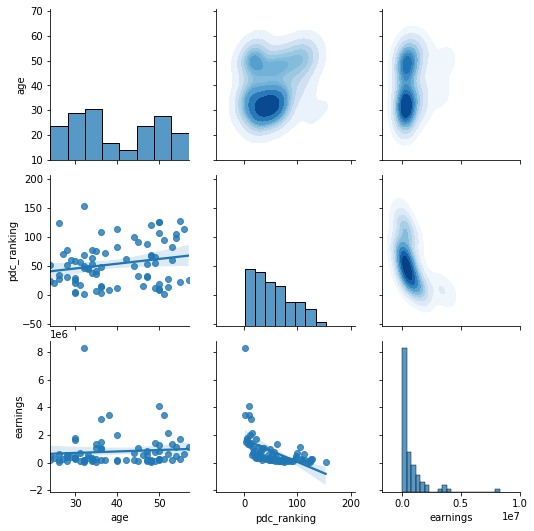

In [39]:
g = sns.PairGrid(profiles)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap='Blues', shade=True)
g = g.map_diag(sns.histplot)

plt.show()

In [4]:
top_players.head()

,Rank,Player,Country,Prize
0,1,Michael van Gerwen,Netherlands,"£8,321,167"
1,2,Phil Taylor,England,"£7,630,816"
2,3,Gary Anderson,Scotland,"£4,118,772"
3,4,Raymond van Barneveld,Netherlands,"£3,510,128"
4,5,Peter Wright,Scotland,"£3,470,888"


In [5]:
top_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     500 non-null    int64 
 1   Player   500 non-null    object
 2   Country  500 non-null    object
 3   Prize    500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [6]:
top_players.columns

Index(['Rank', 'Player', 'Country', 'Prize'], dtype='object')

In [7]:
top_players = top_players.rename({
    'Rank' : 'rank', 
    'Player' : 'name', 
    'Country' : 'country', 
    'Prize' : 'prize'
    }, axis=1)

In [8]:
top_players['prize'] = top_players['prize'].str.replace('£', '')
top_players['prize'] = top_players['prize'].str.replace(',', '')
top_players['prize'] = pd.to_numeric(top_players['prize'])

In [9]:
top_players

,rank,name,country,prize
0,1,Michael van Gerwen,Netherlands,8321167
1,2,Phil Taylor,England,7630816
2,3,Gary Anderson,Scotland,4118772
3,4,Raymond van Barneveld,Netherlands,3510128
4,5,Peter Wright,Scotland,3470888
...,...,...,...,...
495,496,Ben Robb,New Zealand,15339
496,497,Shane O Connor,Ireland,15325
497,498,Karin Krappen,Netherlands,15279
498,499,Ricky Williams,England,15276


In [10]:
top_players['country'].value_counts()

England             218
Netherlands          57
Australia            25
Wales                22
USA                  21
Scotland             21
Germany              14
Belgium              12
Ireland              11
Canada               10
New Zealand          10
Japan                 9
Northern Ireland      9
Austria               8
Finland               5
Sweden                4
Philippines           4
Spain                 4
Poland                3
Hong Kong             3
Denmark               3
Russia                3
Croatia               3
Singapore             2
India                 2
South Africa          2
China                 2
Gibraltar             2
Norway                1
Thailand              1
Lithuania             1
South Korea           1
Czech Rep             1
Greece                1
Latvia                1
Malaysia              1
Portugal              1
Hungary               1
Brazil                1
Name: country, dtype: int64

In [11]:
top_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rank     500 non-null    int64 
 1   name     500 non-null    object
 2   country  500 non-null    object
 3   prize    500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [12]:
top_players.groupby(by='country').mean()['prize'].sort_values(ascending=False)

country
Scotland            489620.047619
Netherlands         334646.017544
Northern Ireland    292545.888889
England             268780.605505
Austria             237474.125000
Wales               220862.454545
Belgium             191038.250000
Lithuania           184407.000000
Singapore           176958.500000
Australia           161552.800000
Poland              158358.333333
Spain               155998.500000
Canada              131841.100000
South Africa        122354.000000
Portugal            105847.000000
Latvia              105677.000000
Germany             100298.857143
Greece               99056.000000
Philippines          91439.250000
Ireland              80087.545455
Russia               74236.000000
Croatia              69788.333333
Sweden               66861.250000
Norway               60585.000000
Finland              60218.600000
Brazil               59367.000000
Japan                51954.222222
Hong Kong            46640.000000
USA                  43191.142857
Denmar

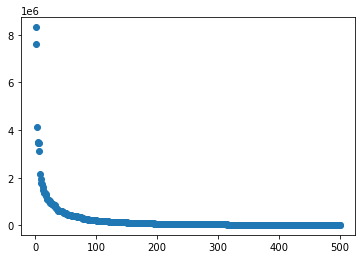

In [13]:
plt.scatter(top_players['rank'], top_players['prize'])

In [30]:
top_players['log prize'] = np.log(top_players['prize'])

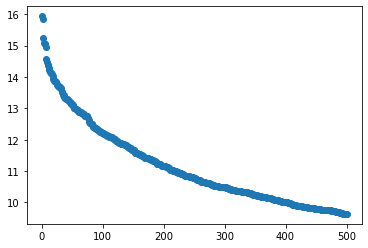

In [31]:
plt.scatter(top_players['rank'], top_players['log prize'])

In [17]:
top_players['inv prize'] = 1/top_players['prize']

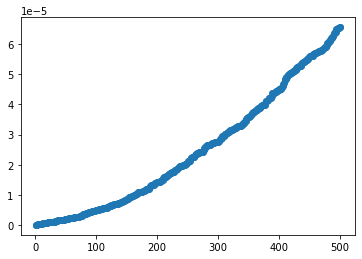

In [18]:
plt.scatter(top_players['rank'], top_players['inv prize'])

In [32]:
top_players.to_csv('./data/cleaned.csv', index=False)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pareto

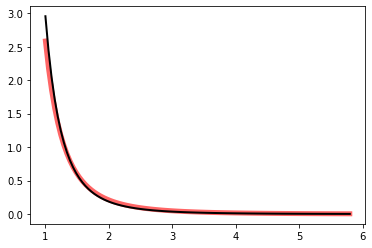

In [35]:
fig, ax = plt.subplots(1, 1)

b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')

x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

rv = pareto(3)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
np.allclose()